SOGComp is SOG run for comparison with SS2DSOG5x5
- compare starting values to check initialization of IC's

In [1]:
import numpy as np
import pandas as pd
import datetime as dtm
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import netCDF4 as nc
import os
import re
import pytz

%matplotlib inline

read in SOG data:

In [2]:
filename='/data/eolson/SOG/SOG-runs/SOGComp/profiles/hoff-SOG.dat'
file_obj = open(filename, 'rt')
for index, line in enumerate(file_obj):
    line = line.strip()
    if line.startswith('*FieldNames:'):
        field_names = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*FieldUnits:'):
        field_units = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*HoffmuellerStartYr:'):
        year_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartDay:'):
        day_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartSec:'):
        sec_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerInterval:'):
         interval = line.split(': ', 1)[1]
    elif line.startswith('*EndOfHeader'):
        break
data = pd.read_csv(filename, delim_whitespace=True, header=0, names=field_names, skiprows=index, chunksize=102)
# Timestamp in matplotlib time
# dt_num = dts.date2num(dtm.datetime.strptime(year_start + ' ' + day_start, '%Y %j')) + float(sec_start)/86400
interval=float(interval)
# Extract dataframe chunks into dictionary
for index, chunk in enumerate(data):
    if index==0:
        da=chunk
    else:
        da=np.dstack((da,chunk))
z=da[:,0,0]
t=np.arange(da.shape[2])
t=(t+1)
tt,zz=np.meshgrid(t,-z)
print field_names

['depth', 'temperature', 'salinity', 'sigma-t', 'micro phytoplankton', 'nano phytoplankton', 'pico phytoplankton', 'micro zooplankton', 'nitrate', 'ammonium', 'silicon', 'dissolved inorganic carbon', 'dissolved oxygen', 'alkalinity', 'DOC detritus', 'POC detritus', 'DON detritus', 'PON detritus', 'refractory N detritus', 'biogenic Si detritus', 'total momentum eddy diffusivity', 'total temperature eddy diffusivity', 'total salinity eddy diffusivity', 'photosynthetic available radiation', 'u velocity', 'v velocity']


load SS2DSOG5x5 data:

In [3]:
resultsDir='/data/eolson/MEOPAR/SS2DSOGruns/run5x5_06/'
fname='SalishSea_1h_20150301_20150302_grid_T.nc'
f=nc.Dataset(os.path.join(resultsDir,fname))
fkeys=f.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
zSS=f.variables[zkey][:]
xxSS,zzSS=np.meshgrid(lons,-z[:])
xtSS,ytSS=np.meshgrid(lons,lats)
print fkeys
#print f.variables['deptht'][:]

[u'nav_lon', u'nav_lat', u'deptht', u'time_counter', u'sossheig', u'votemper', u'vosaline', u'rain_rate', u'snow_rate']


plot phys IC's in same axes:

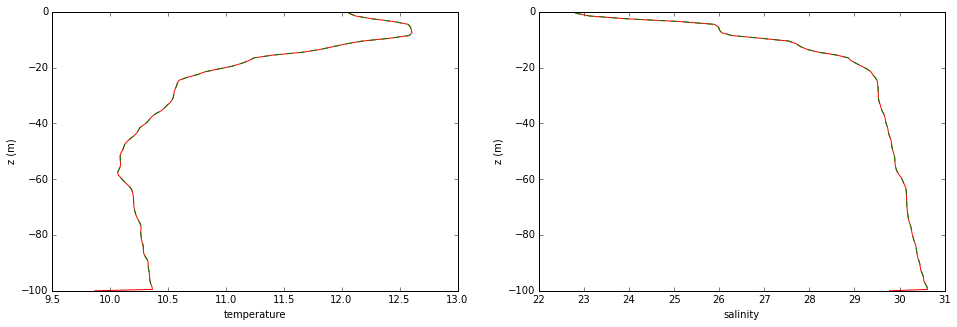

In [4]:
fig, axs = plt.subplots(1,2,figsize=(16,5))

# Temperature
iii=1
pl0=axs[0].plot(da[:,iii,0],-z,color='r')
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel(field_names[iii])
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['votemper'][:,:,:,:]
pl3=axs[0].plot(ivar[0,0:100,2,2],-zSS[0:100],'--',color='g')

# Sal
iii=2
pl0=axs[1].plot(da[:,iii,0],-z,'-',color='r')
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel(field_names[iii])
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['vosaline'][:,:,:,:]
pl3=axs[1].plot(ivar[0,0:100,2,2],-zSS[0:100],'--',color='g')
f.close()

Load SS2DSOG nuts & bio data:

In [5]:
resultsDir='/data/eolson/MEOPAR/SS2DSOGruns/run5x5_06/'
fname='SalishSea_1h_20150301_20150302_ptrc_T.nc'
f=nc.Dataset(os.path.join(resultsDir,fname))
fkeys=f.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
zSS=f.variables[zkey][:]
xxSS,zzSS=np.meshgrid(lons,-z[:])
xtSS,ytSS=np.meshgrid(lons,lats)
print fkeys

[u'nav_lon', u'nav_lat', u'deptht', u'time_counter', u'DIC', u'Alkalini', u'O2', u'CaCO3', u'PO4', u'POC', u'Si', u'PHY', u'ZOO', u'DOC', u'PHY2', u'ZOO2', u'DSi', u'Fer', u'BFe', u'GOC', u'SFe', u'DFe', u'GSi', u'NFe', u'NCHL', u'DCHL', u'NO3', u'NH4']


Load IC's prepared for SS2DSOG5x5:

In [6]:
f2name='/data/eolson/MEOPAR/SS2DSOGruns/nuts_SOG5x5_S3-2014-10-19.nc'
f2=nc.Dataset(f2name)

Plot 3 phyto from SOG, PHY and PHY2 from SS2DSOG (L) and NO3 (R):

[ 0.86795265  0.88507147  0.92696767  0.88090462  0.7382755   0.69270555
  0.72240974  0.71112184  0.76383202  0.845867    0.81989032  0.75065014
  0.704295    0.73489837  0.76441191  0.73424278  0.71725599  0.74804828
  0.74703895  0.78211646  0.89286508  0.95210156  0.86156543  0.95158852
  1.17251706  1.09295573  0.92652678  0.82803343  0.85788681  0.90516939
  0.99808216  0.9854075   0.92375003  0.79836361  0.9115064   1.17739992
  1.10750979  0.96441779  0.86142799  0.93618719  1.04848678  1.02147261
  0.89321136  0.87996488  0.90776375  0.94824851  0.99273514  0.95800301
  0.95120143  0.92458902  0.90239539  0.89002344  0.87166547  0.90501706
  0.89623128  0.88541914  0.8851695   0.90837528  0.98546438  0.95638028
  0.884277    0.86689911  0.90039057  0.90092627  0.8777685   0.86657458
  0.89932753  0.95221375  0.94612678  0.88154269  0.90126741  0.90695988
  0.89116516  0.86609829  0.87646949  0.90181155  0.87380726  0.87743703
  0.89998875  0.97255745  0.9039856   0.88056251  0

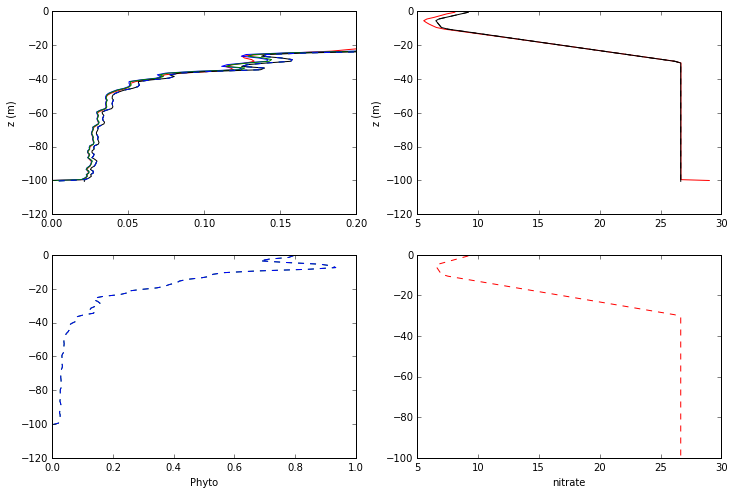

In [7]:
fig, axs = plt.subplots(2,2,figsize=(12,8))

# Phyto
iii=4
pl0=axs[0,0].plot(da[:,iii,0],-z,'-',color='r')
iii=5
pl0=axs[0,0].plot(da[:,iii,0],-z,'-',color='b')
iii=6
pl0=axs[0,0].plot(da[:,iii,0],-z,'-',color='g')
pl0=axs[0,0].plot(f2.variables['PHY'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,0].set_ylabel('z (m)')
axs[1,0].set_xlabel('Phyto')
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar1=f.variables['PHY'][:,:,:,:]
pl3=axs[1,0].plot(ivar1[0,0:101,2,2],-zSS[0:101],'--',color='g')
pl3=axs[0,0].plot(ivar1[0,0:101,2,2],-zSS[0:101],'--',color='g')
ivar2=f.variables['PHY2'][:,:,:,:]
pl3=axs[1,0].plot(ivar2[0,0:101,2,2],-zSS[0:101],'--',color='b')
pl3=axs[0,0].plot(ivar2[0,0:101,2,2],-zSS[0:101],'--',color='b')
axs[0,0].set_xlim([0,.2])
print da[0:101,5,0]/ivar2[0,0:101,2,2]
print da[0:101,6,0]/ivar1[0,0:101,2,2]

# NO
iii=8
pl0=axs[0,1].plot(da[:,iii,0],-z,'-',color='r')
pl0=axs[0,1].plot(f2.variables['NO3'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,1].set_ylabel('z (m)')
axs[1,1].set_xlabel(field_names[iii])
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['NO3'][:,:,:,:]
pl3=axs[1,1].plot(ivar[0,0:100,2,2],-zSS[0:100],'--',color='r')
pl3=axs[0,1].plot(ivar[0,0:100,2,2],-zSS[0:100],'--',color='k')
#print ivar[0,0:100,2,2]
print da[0:101,iii,0]/ivar[0,0:101,2,2]

In [8]:
print f.variables['NH4'].shape

(17280, 101, 5, 5)


Plot Si (L) and NH4 (R)

[ 0.94660985  1.00862546  1.00154911  1.00860256  1.01742188  0.9764067
  0.93331111  0.9398577   0.95036694  0.96323987  0.94037322  0.91753581
  0.92621943  0.93244281  0.93781077  0.94245049  0.9462164   0.94934495
  0.95214245  0.95459262  0.95680894  0.95885871  0.96066037  0.96219585
  0.96363228  0.96498723  0.96620452  0.96730443  0.96832165  0.96928895
  0.98487843  1.00001031  1.00002265  1.00002677  1.00002882  1.000035
  1.00004734  1.00005351  1.00005145  1.00004734  1.00004528  1.00004323
  1.00004117  1.00003911  1.00003705  1.000035    1.00003294  1.00003294
  1.00003088  1.00003088  1.00002882  1.00002882  1.00002677  1.00002677
  1.00002677  1.00002471  1.00002471  1.00002471  1.00002471  1.00002471
  1.00002471  1.00002471  1.00002471  1.00002265  1.00002265  1.00002265
  1.00002265  1.00002265  1.00002265  1.00002265  1.00002265  1.00002265
  1.00002059  1.00002059  1.00002059  1.00002059  1.00002059  1.00002059
  1.00002059  1.00002059  1.00002059  1.00002059  1.00

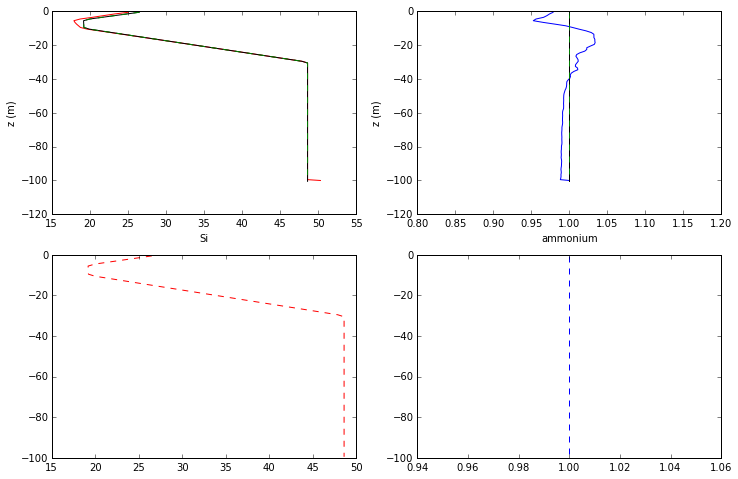

In [11]:
fig, axs = plt.subplots(2,2,figsize=(12,8))

# Si
iii=10
pl0=axs[0,0].plot(da[:,iii,0],-z,'-',color='r')
axs[0,0].set_ylabel('z (m)')
axs[0,0].set_xlabel('Si')
pl0=axs[0,0].plot(f2.variables['Si'][0,0:101,2,2],-zSS[0:101],'-',color='k')
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['Si'][:,:,:,:]
pl3=axs[1,0].plot(ivar[0,0:100,2,2],-zSS[0:100],'--',color='r')
pl4=axs[0,0].plot(ivar[0,0:100,2,2],-zSS[0:100],'--',color='g')
print da[0:100,iii,0]/ivar[0,0:100,2,2]

# NH4
iii=9
pl0=axs[0,1].plot(da[:,iii,0],-z,'-',color='b')
pl0=axs[0,1].plot(f2.variables['NH4'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,1].set_ylabel('z (m)')
axs[0,1].set_xlabel(field_names[iii])
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['NH4'][:,:,:,:]
pl3=axs[1,1].plot(ivar[0,0:100,2,2],-zSS[0:100],'--',color='b')
pl4=axs[0,1].plot(ivar[0,0:100,2,2],-zSS[0:100],'--',color='g')
axs[0,1].set_xlim([.8,1.2])
print da[0:100,iii,0]/ivar[0,0:100,2,2]

REPEAT WITH LATER TIME FOR NEMO:

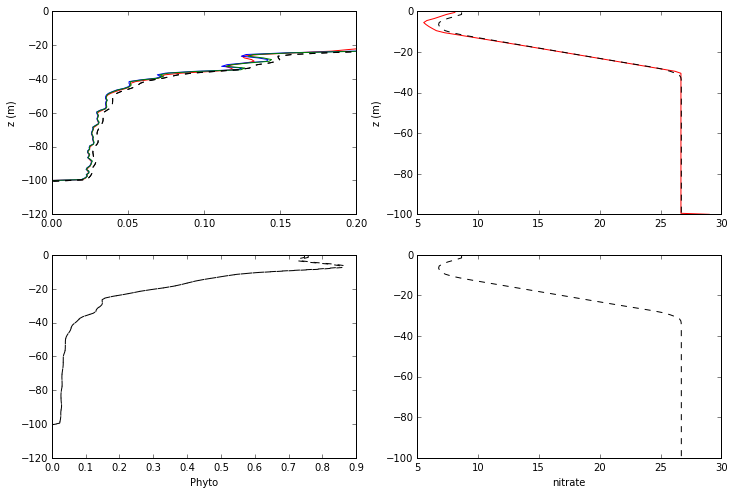

In [21]:
fig, axs = plt.subplots(2,2,figsize=(12,8))

# Phyto
iii=4
pl0=axs[0,0].plot(da[:,iii,0],-z,'-',color='r')
iii=5
pl0=axs[0,0].plot(da[:,iii,0],-z,'-',color='b')
iii=6
pl0=axs[0,0].plot(da[:,iii,0],-z,'-',color='g')
#pl0=axs[0,0].plot(f2.variables['PHY'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,0].set_ylabel('z (m)')
axs[1,0].set_xlabel('Phyto')
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar1=f.variables['PHY'][:,:,:,:]
pl3=axs[1,0].plot(ivar1[8900,0:101,2,2],-zSS[0:101],'--',color='k')
pl3=axs[0,0].plot(ivar1[8900,0:101,2,2],-zSS[0:101],'--',color='k')
ivar2=f.variables['PHY2'][:,:,:,:]
pl3=axs[1,0].plot(ivar2[8900,0:101,2,2],-zSS[0:101],'--',color='k')
pl3=axs[0,0].plot(ivar2[8900,0:101,2,2],-zSS[0:101],'--',color='k')
axs[0,0].set_xlim([0,.2])

# NO
iii=8
pl0=axs[0,1].plot(da[:,iii,0],-z,'-',color='r')
#pl0=axs[0,1].plot(f2.variables['NO3'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,1].set_ylabel('z (m)')
axs[1,1].set_xlabel(field_names[iii])
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['NO3'][:,:,:,:]
pl3=axs[1,1].plot(ivar[8900,0:100,2,2],-zSS[0:100],'--',color='k')
pl3=axs[0,1].plot(ivar[8900,0:100,2,2],-zSS[0:100],'--',color='k')
#print ivar[0,0:100,2,2]


(0.8, 1.2)

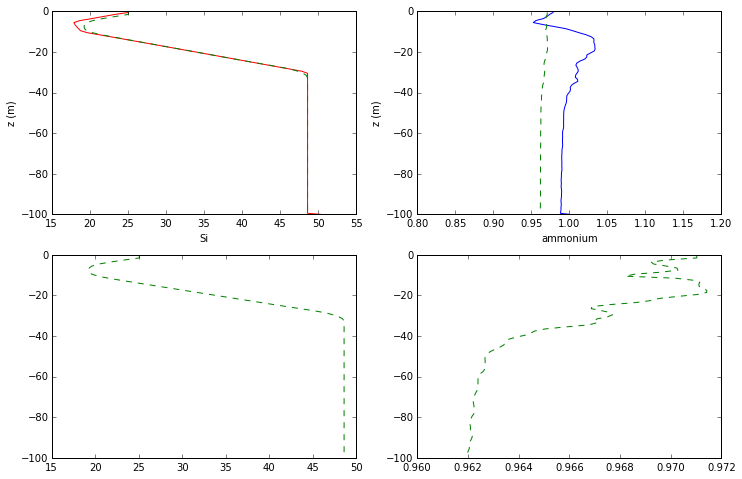

In [20]:
fig, axs = plt.subplots(2,2,figsize=(12,8))

# Si
iii=10
pl0=axs[0,0].plot(da[:,iii,0],-z,'-',color='r')
axs[0,0].set_ylabel('z (m)')
axs[0,0].set_xlabel('Si')
#pl0=axs[0,0].plot(f2.variables['Si'][0,0:101,2,2],-zSS[0:101],'-',color='k')
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['Si'][:,:,:,:]
pl3=axs[1,0].plot(ivar[6900,0:100,2,2],-zSS[0:100],'--',color='g')
pl4=axs[0,0].plot(ivar[6900,0:100,2,2],-zSS[0:100],'--',color='g')

# NH4
iii=9
pl0=axs[0,1].plot(da[:,iii,0],-z,'-',color='b')
#pl0=axs[0,1].plot(f2.variables['NH4'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,1].set_ylabel('z (m)')
axs[0,1].set_xlabel(field_names[iii])
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['NH4'][:,:,:,:]
pl3=axs[1,1].plot(ivar[6900,0:100,2,2],-zSS[0:100],'--',color='g')
pl4=axs[0,1].plot(ivar[6900,0:100,2,2],-zSS[0:100],'--',color='g')
axs[0,1].set_xlim([.8,1.2])

In [ ]:
iii=4
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

In [ ]:
iii=5
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

6


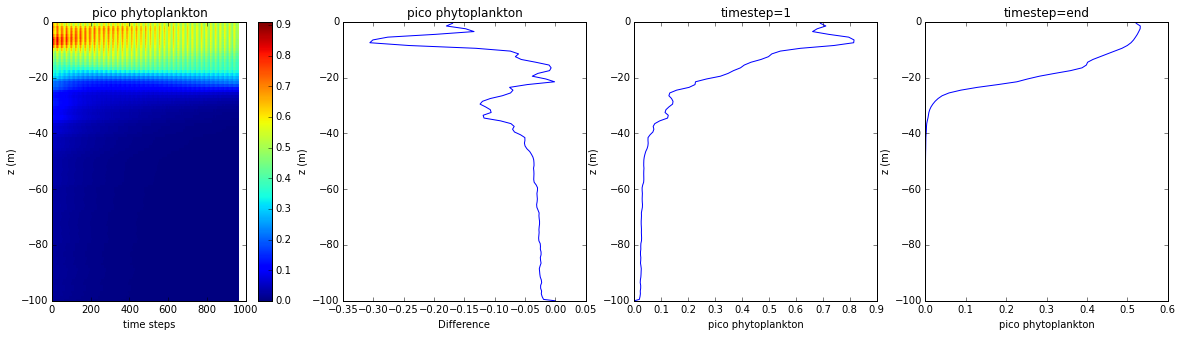

In [12]:
iii=6
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

7


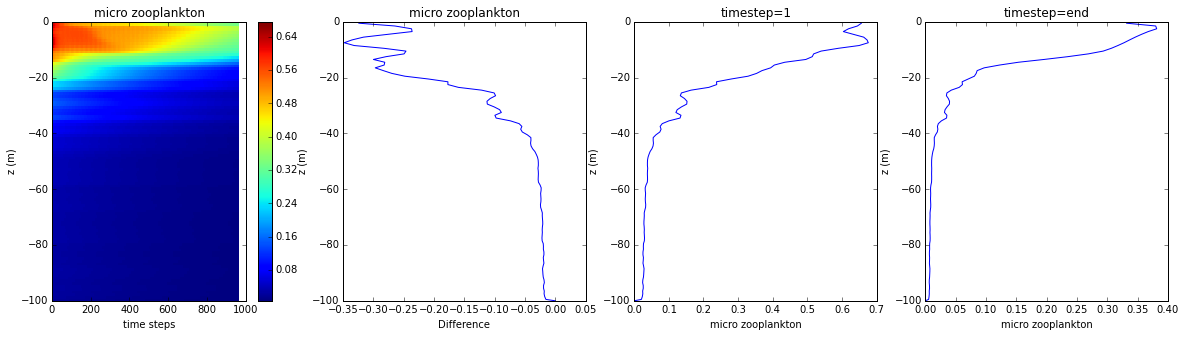

In [13]:
iii=7
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

8


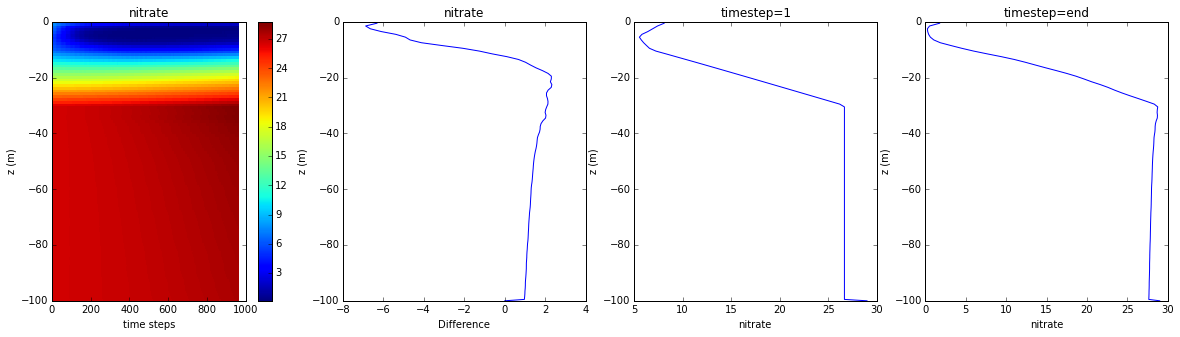

In [14]:
iii=8
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

In [15]:
print da[:,iii,0]

[  8.1089   8.1089   7.4143   6.9144   6.4138   5.805    5.5464   5.7413
   5.9834   6.2771   6.5841   7.2486   8.2882   9.3064  10.3266  11.3451
  12.3529  13.353   14.3517  15.3465  16.3398  17.3328  18.3218  19.3064
  20.291   21.2754  22.258   23.2395  24.2206  25.2017  26.1827  26.6734
  26.6738  26.6739  26.6739  26.6739  26.6738  26.6737  26.6736  26.6736
  26.6736  26.6735  26.6734  26.6734  26.6734  26.6733  26.6733  26.6732
  26.6732  26.6732  26.6732  26.6731  26.6731  26.6731  26.6731  26.6731
  26.6731  26.6731  26.6731  26.6731  26.6731  26.6731  26.6732  26.6732
  26.6732  26.6732  26.6732  26.6732  26.6732  26.6732  26.6732  26.6732
  26.6732  26.6733  26.6733  26.6733  26.6733  26.6733  26.6733  26.6733
  26.6733  26.6733  26.6733  26.6733  26.6733  26.6733  26.6733  26.6733
  26.6733  26.6734  26.6734  26.6734  26.6734  26.6734  26.6734  26.6734
  26.6734  26.6734  26.6734  26.6734  26.6734  29.    ]


9


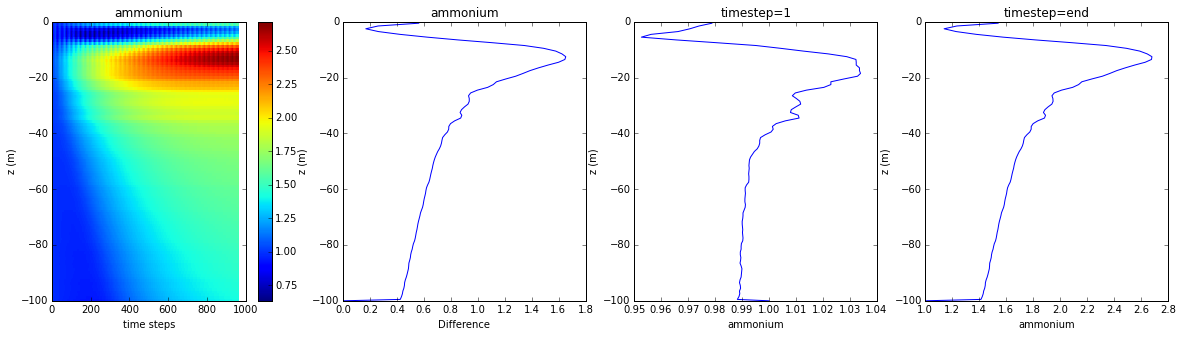

In [16]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

10


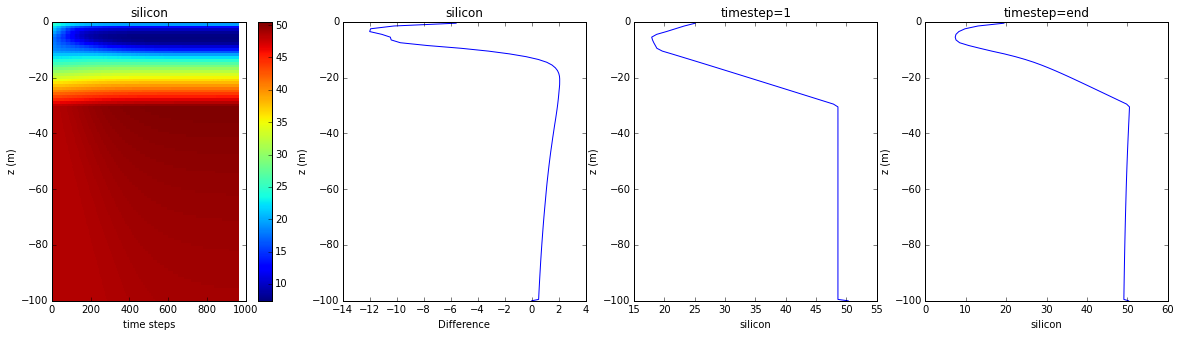

In [17]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

11


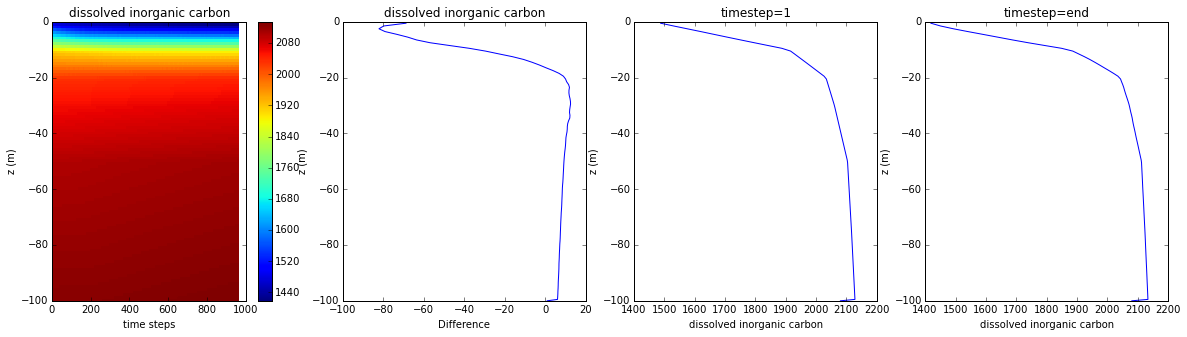

In [18]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

12


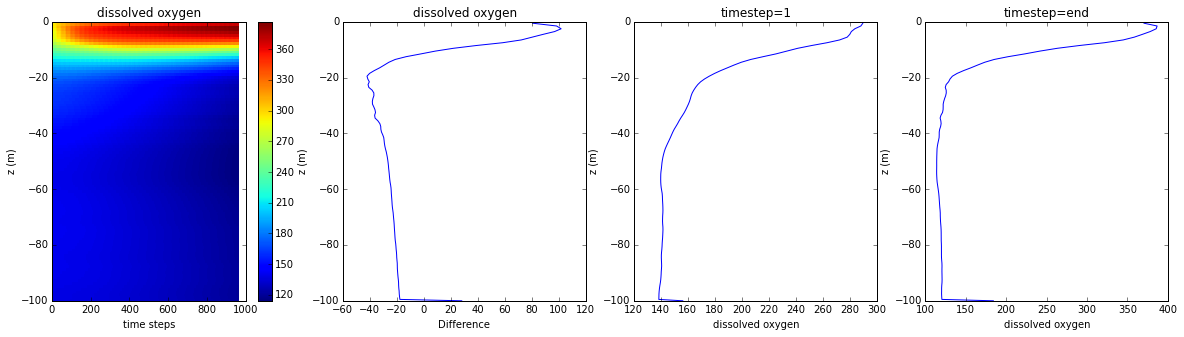

In [19]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

13


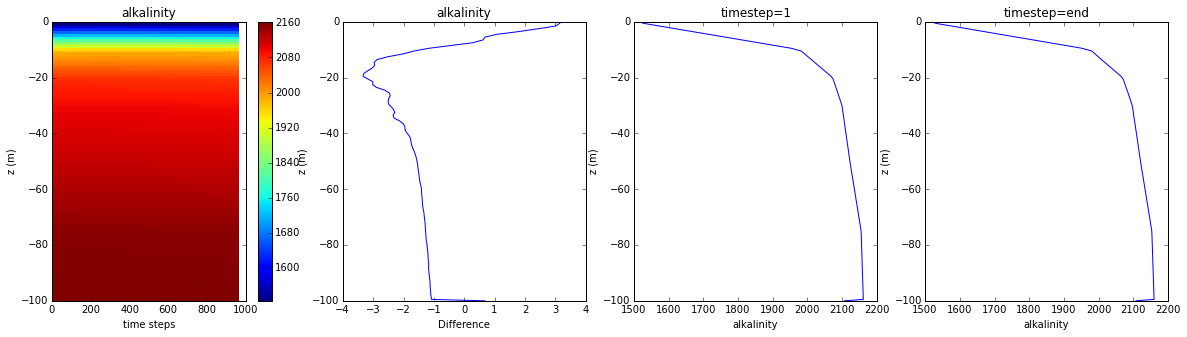

In [20]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

14


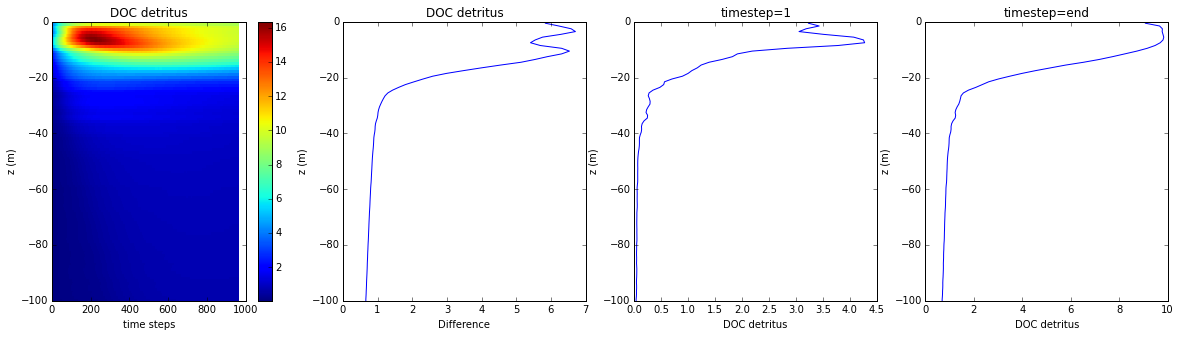

In [26]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

15


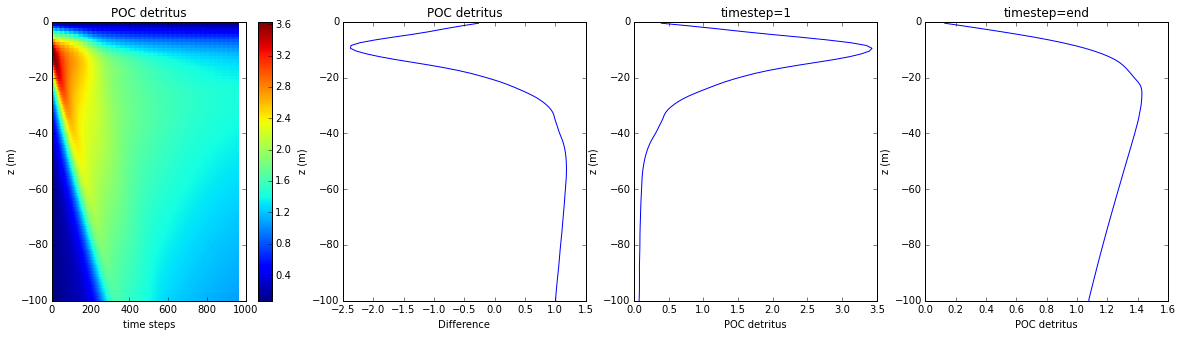

In [27]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

16


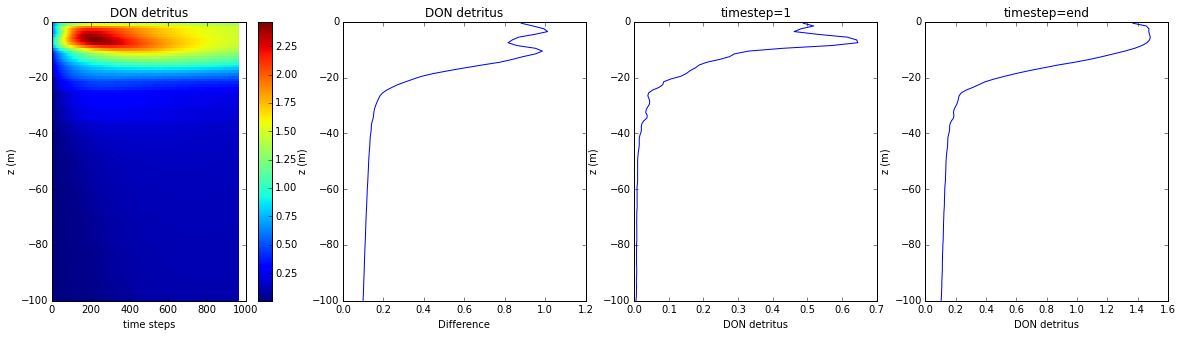

In [28]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

17


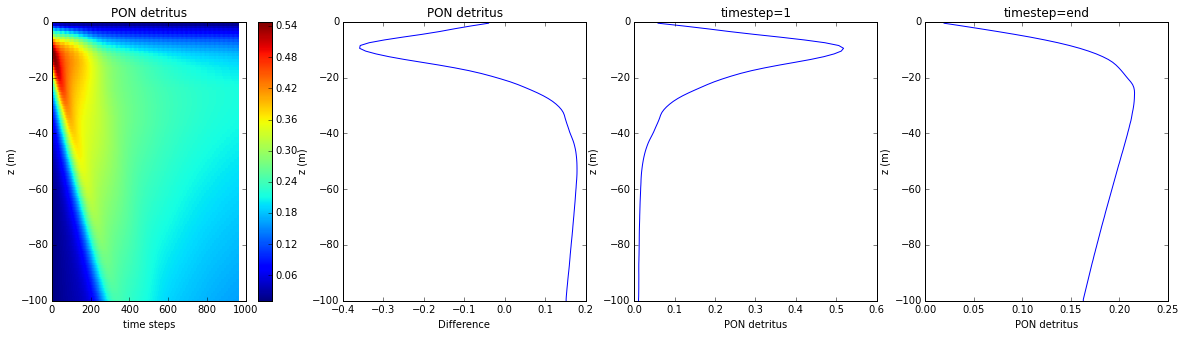

In [29]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

18


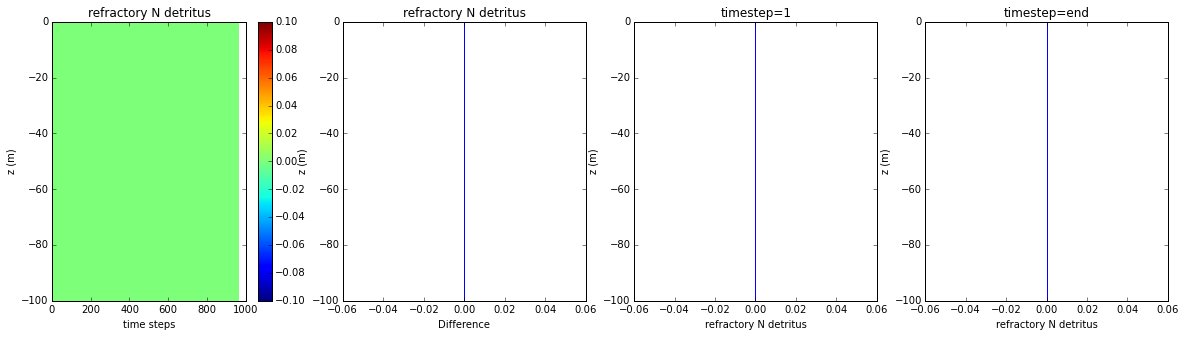

In [30]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

19


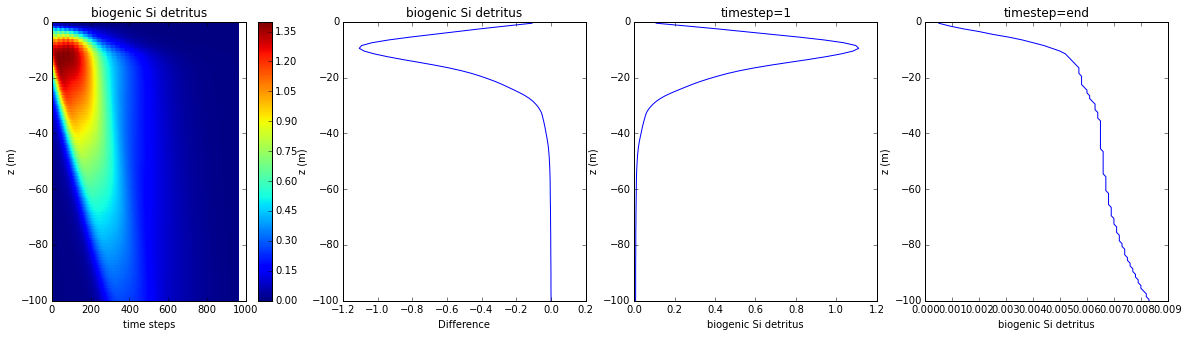

In [31]:
iii+=1
print iii

fig, axs = plt.subplots(1,4,figsize=(20,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])

d=da[:,iii,da.shape[2]-1]-da[:,iii,0]
pl1=axs[1].plot(d,-z)
axs[1].set_ylabel('z (m)')
axs[1].set_xlabel('Difference')
axs[1].set_title(field_names[iii])

pl2=axs[2].plot(da[:,iii,0],-z)
axs[2].set_ylabel('z (m)')
axs[2].set_xlabel(field_names[iii])
axs[2].set_title('timestep=1')

pl3=axs[3].plot(da[:,iii,da.shape[2]-1],-z)
axs[3].set_ylabel('z (m)')
axs[3].set_xlabel(field_names[iii])
axs[3].set_title('timestep=end')

In [32]:
iii+=1
print iii


20


In [33]:
iii+=1
print iii


21


In [34]:
iii+=1
print iii


22


23


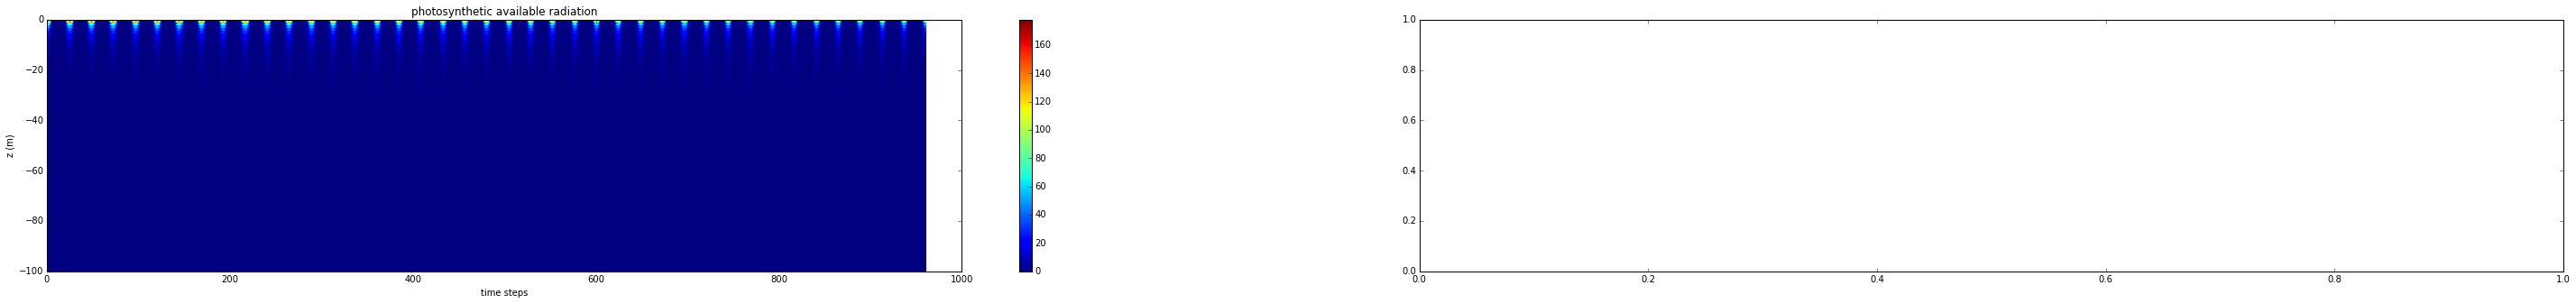

In [35]:
iii+=1
print iii

fig, axs = plt.subplots(1,2,figsize=(50,5))
mesh0=axs[0].pcolormesh(tt,zz,da[:,iii,:])
fig.colorbar(mesh0,ax=axs[0])
axs[0].set_ylabel('z (m)')
axs[0].set_xlabel('time steps')
axs[0].set_title(field_names[iii])


In [36]:
iii+=1
print iii

24


In [37]:
iii+=1
print iii

25
